# Business Case: Netflix


### Ques 1 : Defining Problem Statement and Analysing basic metrics 

### Ans 1 :
Problem Statement :- 

Analyze the data and generate insights from data that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

Possible approach :- 
- We can find the number of Movies and TV Shows per Year / Month 
- We can find the number of Movies and TV shows per Genre 
- We can find the number of Movies and TV shows per Country where produces
- We can find the number of Movies and TV shows per Cast ( To know if specific Cast movies /tv-shows preferred ) 
- We can find the number of Movies and TV shows per Director  (To know if particular director Movies /TV Shows is prefered )
- Ploting of Different plots like countplot , histogram , box plot can also be done to visualize data and infer from it.





### Ques 2 : Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary 

### Ans 2 : 

For analyzing above , we will fist read the "netflix.csv" and on check the data type of each column


In [197]:
import numpy as np
import pandas as pd

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

In [455]:
data =pd.read_csv("netflix.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [200]:
# Basic Data Information -number of rows ,column data type , number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [201]:
# Missing value detection : How many null /missing values there in each column is shown by below isna().sum() command .
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [202]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Observation : 
There are 8807 rows /records in total and 12 columns as shown above . Seeing above we can also see data type of each column and how many non-null counts are these in each colunmn .

Columns : director , cast ,country ,data_added , rating , duration has some Null values in them ( as shown in .isna().sum() o/p ).

### Ques 3 : Non-Graphical Analysis: Value counts and unique attributes 

### Ans 3:
For type of Data getting number of count for each unique value in 'type' column .

In [456]:
data['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

- Note :There are only 2 unique values in 'type' column : Movies and Tv SHows . Deviding Movies and Tv Shows in 2 data frames : data_movies and data_tvshow

In [457]:
data_movies = data[data['type'] == 'Movie']
print(data_movies.shape)
data_movies.head(5)

(6131, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [458]:
data_tvshow = data[data['type'] == 'TV Show']
print(data_tvshow.shape)
data_tvshow.head()

(2676, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [206]:
print('Number of Movies = ',len(data_movies),'\nNumber of TV Shows = ',len(data_tvshow))
# Note : To get number of rows can also use  '.shape[0]' with data_movies and data_tvshow .

Number of Movies =  6131 
Number of TV Shows =  2676


### Observation :- 
There are only 2 unique values in 'type' column (no null values ) : Movies and Tv Shows  .Number of movies released in Netflix is way more than number of Tv-SHows released as shown above . 


In [219]:
data_movies['duration'].value_counts()

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

### Observation :- 
90 minutes Movies are most released in Netflix . Very long duration movies around 200 minutes and very short duartion ones are least released , so it means they are least prefereed by users.

In [220]:
data_tvshow['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

### Observation :- 
TV shows of having only 1 Season are most released in Netflix . Very long duration (most seasons) tv shows are least released , so it means they are least prefereed by users.

In [459]:
data_copy = data.copy()

data_copy['date_added']=pd.to_datetime(data_copy['date_added'])
data_copy.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [222]:
data_copy.info()  # Note: now data type of date_added column is 'datetime'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [223]:
data_copy['country'].value_counts()   # Will unnest / explode the country column in below sections 

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [224]:
data_copy['director'].value_counts()  # Will unnest / explode the director column in below sections 

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [225]:
data_copy['cast'].value_counts()   # Will unnest / explode the cast column in below sections 

David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                                   

In [226]:
data_copy['listed_in'].value_counts()    # Will unnest / explode the listed_in column in below sections 

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

### Observation :-  
Can see there are multiple values in signle row for columns : country , director , cast adn listed_in columns ,so will unnest the data as shown below .

In [461]:
# Extracting Year and Month from date added
data_copy['date_added_Year'] = data_copy['date_added'].dt.year
data_copy['date_added_Month'] = data_copy['date_added'].dt.month
data_copy.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_Year,date_added_Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0


In [229]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           8807 non-null   object        
 1   type              8807 non-null   object        
 2   title             8807 non-null   object        
 3   director          6173 non-null   object        
 4   cast              7982 non-null   object        
 5   country           7976 non-null   object        
 6   date_added        8797 non-null   datetime64[ns]
 7   release_year      8807 non-null   int64         
 8   rating            8803 non-null   object        
 9   duration          8804 non-null   object        
 10  listed_in         8807 non-null   object        
 11  description       8807 non-null   object        
 12  date_added_Year   8797 non-null   float64       
 13  date_added_Month  8797 non-null   float64       
dtypes: datetime64[ns](1), fl

### Ques 4 : Visual Analysis - Univariate, Bivariate after pre-processing of the data

### Ans 4 :  

- Unnesting Data in columns cast , drector , cOuntry and listed_in

In [462]:
# Creating a new Data frame data_unnest for Question 4 
data_unnest = data_copy.copy()  # Deep Copy
data_unnest.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_added_Year,date_added_Month
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


In [344]:
# Creating data frame for each column which we are about to explode (unnest) in them .
data_director_exp = data_unnest.copy()
data_cast_exp     = data_unnest.copy()
data_country_exp  = data_unnest.copy()
data_listed_in_exp= data_unnest.copy()

In [345]:
# Exploding (Unnesting) column Director 

data_director_exp['director'] = data_director_exp['director'].str.split(',')
data_director_exp= data_director_exp.explode('director',ignore_index = True)
data_director_exp['director'] = data_director_exp['director'].str.strip()


In [347]:
# Exploding (Unnesting) column cast

data_cast_exp['cast'] = data_cast_exp['cast'].str.split(',')
data_cast_exp = data_cast_exp.explode('cast',ignore_index = True)
data_cast_exp['cast'] = data_cast_exp['cast'].str.strip()

In [349]:
# Exploding (Unnesting) column country

data_country_exp['country'] = data_country_exp['country'].str.split(',')
data_country_exp = data_country_exp.explode('country',ignore_index = True)
data_country_exp['country'] = data_country_exp['country'].str.strip()

In [351]:
# Exploding (Unnesting) column listed_in

data_listed_in_exp['listed_in'] = data_listed_in_exp['listed_in'].str.split(',')
data_listed_in_exp = data_listed_in_exp.explode('listed_in',ignore_index = True)
data_listed_in_exp['listed_in'] = data_listed_in_exp['listed_in'].str.strip()

In [449]:
data_director_exp.shape

(9612, 14)

In [357]:
data_director_exp['director'].value_counts()

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Name: director, Length: 4993, dtype: int64

In [ ]:
#Director : Rajiv Chilaka  has produced  most number of movies and tv shows in nteflix as compared to other directors.

In [452]:
data_cast_exp.shape

(64951, 14)

In [359]:
data_cast_exp['cast'].value_counts()

Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Name: cast, Length: 36439, dtype: int64

In [ ]:
# Cast : Anupan Kher has apperead in most number of movies and tv shows as compared to other cast .

In [453]:
data_country_exp.shape

(10850, 14)

In [361]:
data_country_exp['country'].value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

In [454]:
data_listed_in_exp.shape

(19323, 14)

In [363]:
data_listed_in_exp['listed_in'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
C

### Observation : 
- After Unnesting column Country we observed , most movies and tv shows are produced in 'United States' and then 'India'
- After Unnesting column Cast we observed , Actor 'Anupam Kher ' has appeared in most Movies and Tv_Shows
- After Unnesting column Director we observed, Director 'Rajiv Chilaka' has directed most Movies and Tv Shows .
- After Unnesting column Listied_in we observed, most movies and tv shows are of Genre 'International Movies'

In [ ]:
# Seeing the value counts we can conclude that value counts after Unnesting Column Director and Case is very less . 
# Large sample counts is given in value counts of Country Produced and Genre Type .
# So it is better to different data based on Country Produced and Genre Type

### 1. Univariate Analysis 

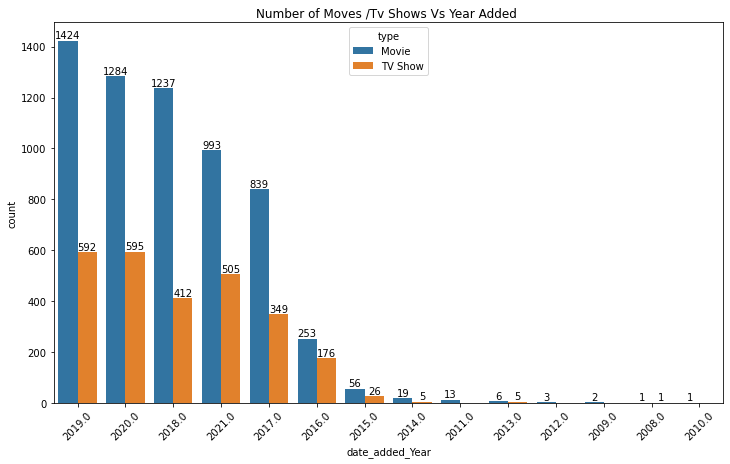

In [364]:
# # Continuous Data COUNT PLOT 
plt.figure(figsize = (12,7))

ax = sns.countplot(data =data_unnest , x= 'date_added_Year' , hue = 'type' , order = data_unnest['date_added_Year'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 45 )
plt.title('Number of Moves /Tv Shows Vs Year Added ')
plt.show()

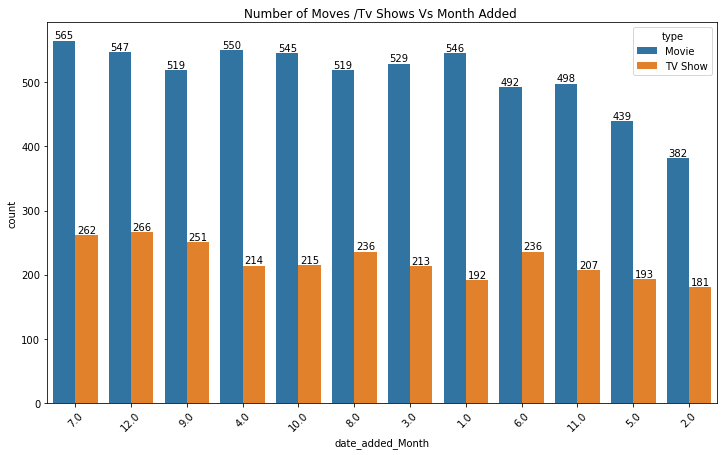

In [365]:
# Continuous Data COUNT PLOT
plt.figure(figsize = (12,7))

ax = sns.countplot(data =data_unnest , x= 'date_added_Month' ,hue = 'type' , order = data_unnest['date_added_Month'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 45 )
plt.title('Number of Moves /Tv Shows Vs Month Added ')
plt.show()

In [366]:
data_country_exp['country'].value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

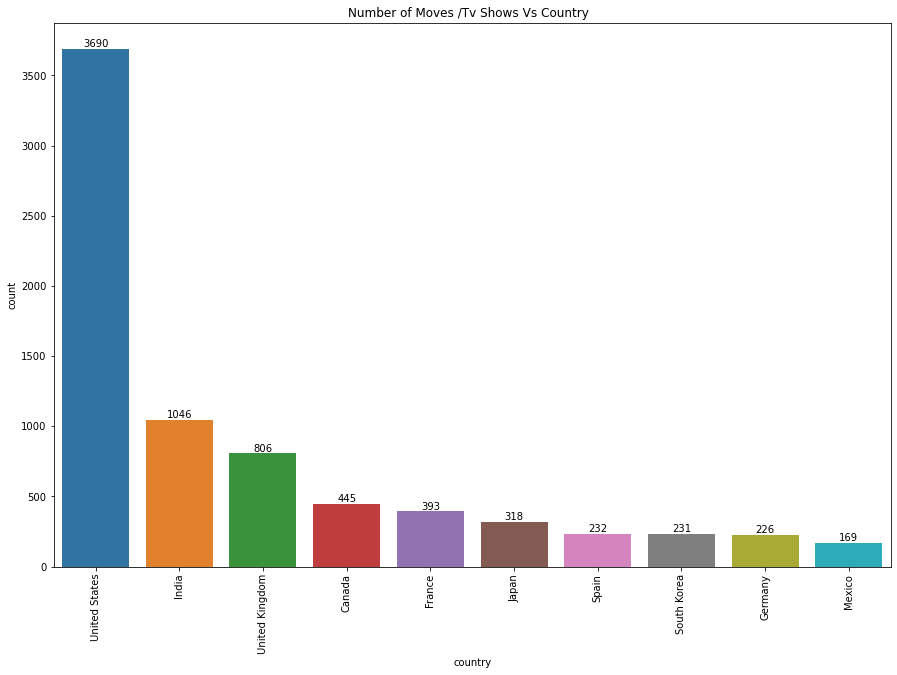

In [367]:
# Categorical Data Count Plot 

# As number of countries very large so getting top 10 countries based on number of movies and shows prodeced there 
top_10 = data_country_exp[ data_country_exp['country'].isin(data_country_exp['country'].value_counts().index[:10])]

plt.figure(figsize = (15,10))

ax = sns.countplot(data =top_10 , x= 'country' , order = top_10['country'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 90 )
plt.title('Number of Moves /Tv Shows Vs Country  ')
plt.show()

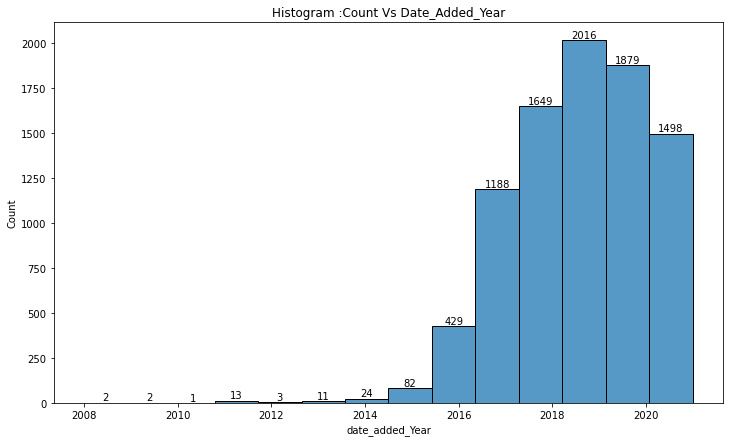

In [369]:
# HISTOGRAM 
plt.figure(figsize = (12,7))
ax = sns.histplot(data_unnest['date_added_Year'],bins = data_unnest['date_added_Year'].value_counts().size)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Histogram :Count Vs Date_Added_Year')
plt.show()

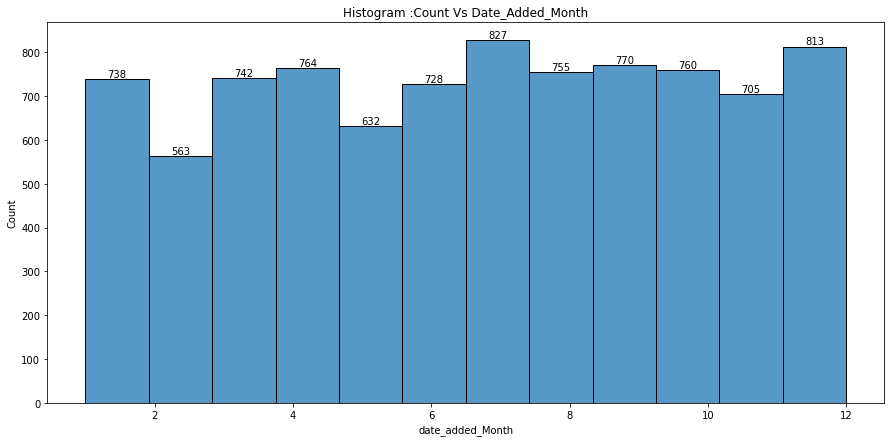

In [370]:
# HISTOGRAM 
plt.figure(figsize = (15,7))
ax = sns.histplot(data_unnest['date_added_Month'],bins = data_unnest['date_added_Month'].value_counts().size)
for i in ax.containers:
    ax.bar_label(i)
plt.title('Histogram :Count Vs Date_Added_Month')
plt.show()

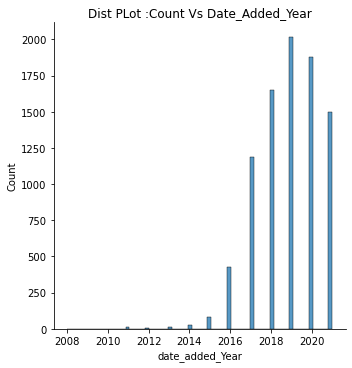

In [371]:
# Dist PLOT

sns.displot(data = data_unnest, x='date_added_Year' )
plt.title('Dist PLot :Count Vs Date_Added_Year')
plt.show()

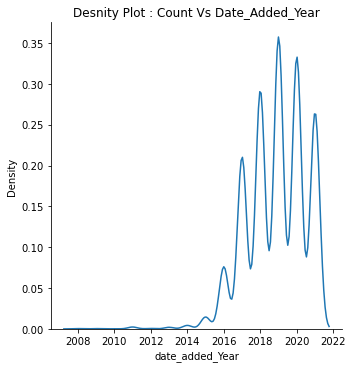

In [372]:
# Density Plot

sns.displot(data = data_unnest, x='date_added_Year',kind='kde' )
plt.title('Desnity Plot : Count Vs Date_Added_Year')
plt.show()

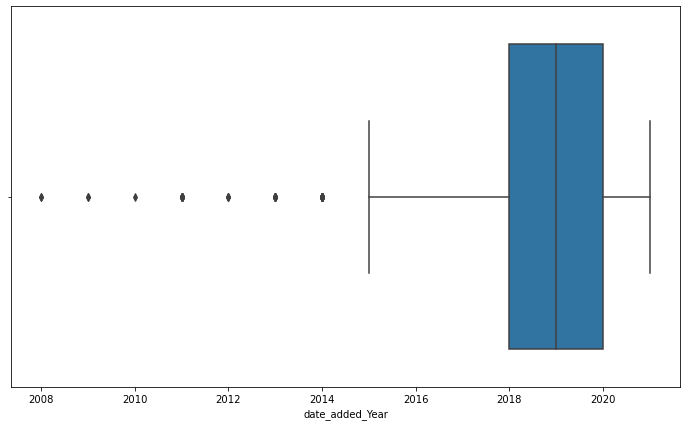

In [373]:
# Box Plot 
plt.figure(figsize = (12,7))
sns.boxplot(x=  data_unnest['date_added_Year'])
plt.show()

# Show that very less number of records for Movies / SHows added in year <= 2015 so they can be considered as outliers in 
# comparision to number of movies and shows added after 2015 .

### 2. Bivariate Analysis 

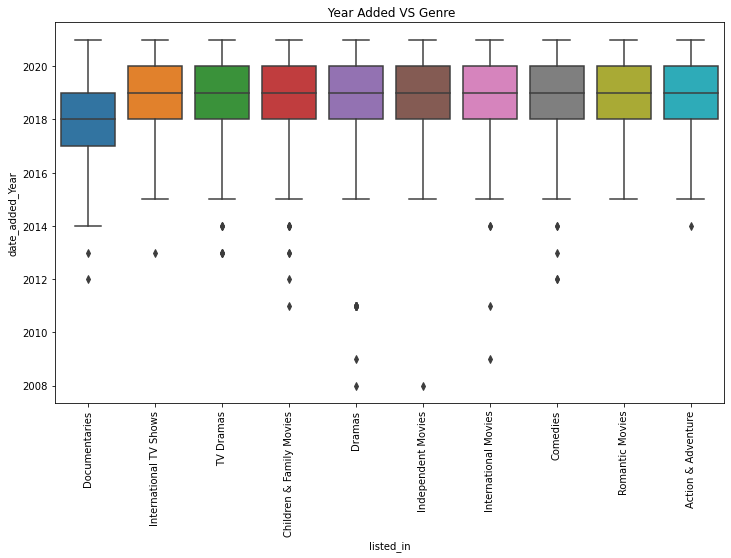

In [376]:
# Categorical vs Numerical -Bar pLot 

# As number of Genre very large so getting top 10 genres based on number of movies and shows prodeced there 
top_10 = data_listed_in_exp[ data_listed_in_exp['listed_in'].isin(data_listed_in_exp['listed_in'].value_counts().index[:10])]

plt.figure(figsize = (12,7))

ax = sns.boxplot(data =top_10 , y= 'date_added_Year' , x ='listed_in'  )


plt.xticks(rotation = 90)
plt.title('  Year Added VS Genre ')
plt.show()

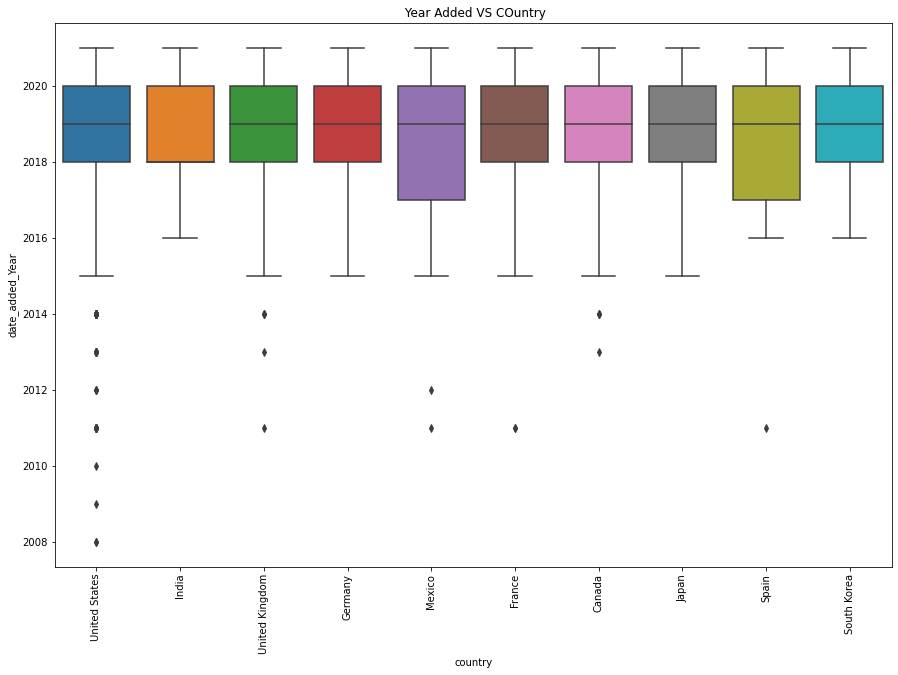

In [377]:
# Categorical vs Numerical -Bar pLot 

# As number of countries very large so getting top 10 countrie sbased on number of movies and shows prodeced there 
top_10 = data_country_exp[ data_country_exp['country'].isin(data_country_exp['country'].value_counts().index[:10])]

plt.figure(figsize = (15,10))

ax = sns.boxplot(data =top_10 , y= 'date_added_Year' , x ='country'  )

plt.xticks(rotation = 90)
plt.title('  Year Added VS COuntry ')
plt.show()

###  PAIR PLOT

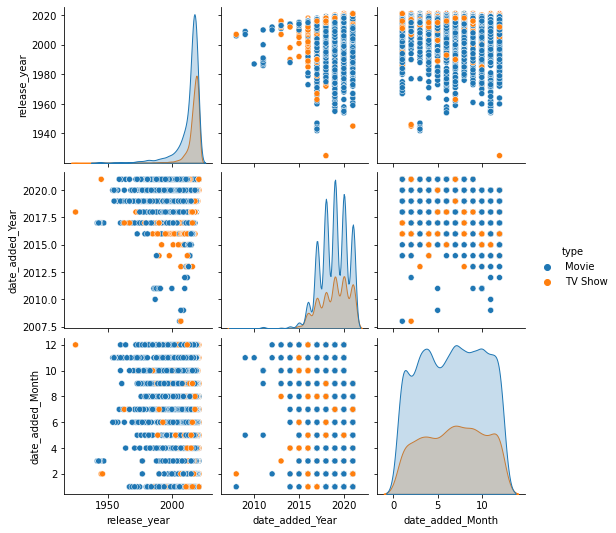

In [378]:
sns.pairplot(data =data_unnest ,hue = 'type' )
plt.show()

### Correlation - Heat Map

In [379]:
data_unnest.corr()

,release_year,date_added_Year,date_added_Month
release_year,1.000000,0.111531,-0.039179
date_added_Year,0.111531,1.000000,-0.160421
date_added_Month,-0.039179,-0.160421,1.000000


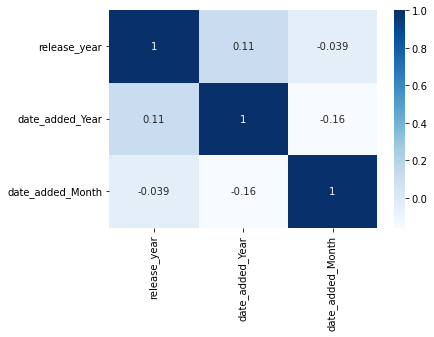

In [380]:
sns.heatmap(data_unnest.corr() ,cmap ='Blues' , annot =True)
plt.show()

### Ques 5: Missing Value & Outlier check

### Ans 5: 
To check missing value we are going to use 'isna().sum() '

In [381]:
data_copy.isna().sum()

show_id                0
type                   0
title                  0
director            2634
cast                 825
country              831
date_added            10
release_year           0
rating                 4
duration               3
listed_in              0
description            0
date_added_Year       10
date_added_Month      10
dtype: int64

### Observation :
There are 8807 rows /records in total and 12 columns as shown above . Seeing above we can also see data type of each column and how many non-null counts are these in each colunmn .

Columns : director , cast ,country ,data_added, rating , duration has some Null values in them ( as shown in .isna().sum() o/p ).

In [326]:
## Outlier Check for Date_Added_Year : Using 'data_unnest' for this as we have already extracted year here

In [382]:
data_unnest['date_added_Year'].value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added_Year, dtype: int64

In [336]:
# For data added year any year below 2015 can be considered Outlier as there count is very less 

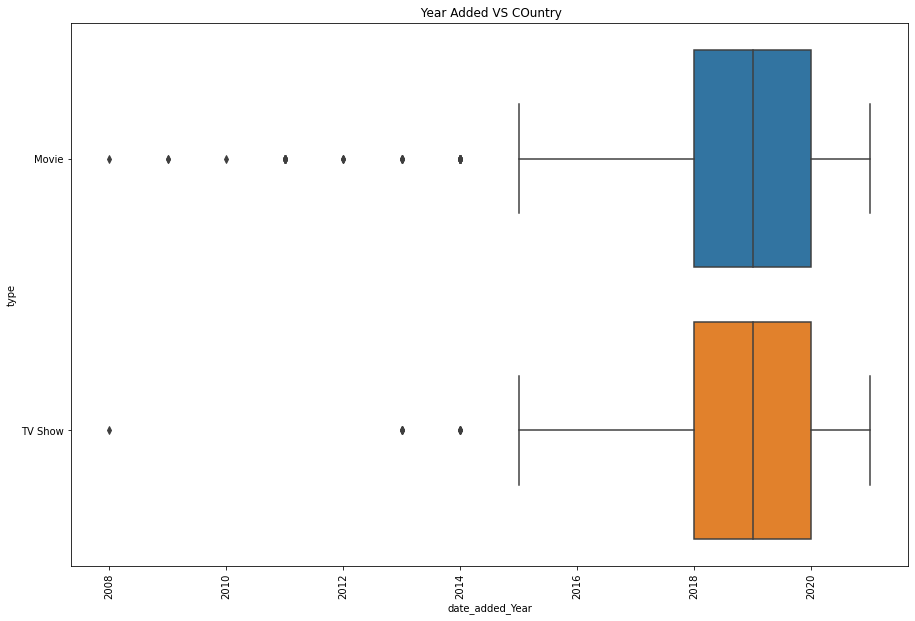

In [383]:
# Categorical vs Numerical -Bar pLot : outlier date_added_year check for  movies & tv shows produced  for each year 


plt.figure(figsize = (15,10))

ax = sns.boxplot(data =data_unnest, x= 'date_added_Year' , y ='type'  )

plt.xticks(rotation = 90)
plt.title('  Year Added VS COuntry ')
plt.show()

### Observation :

Show that very less number of records for Movies / SHows added in year <= 2015 so they can be considered as outliers in 
comparision to number of movies and shows added after 2015 .

In [384]:
data_country_exp['country'].value_counts()


United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

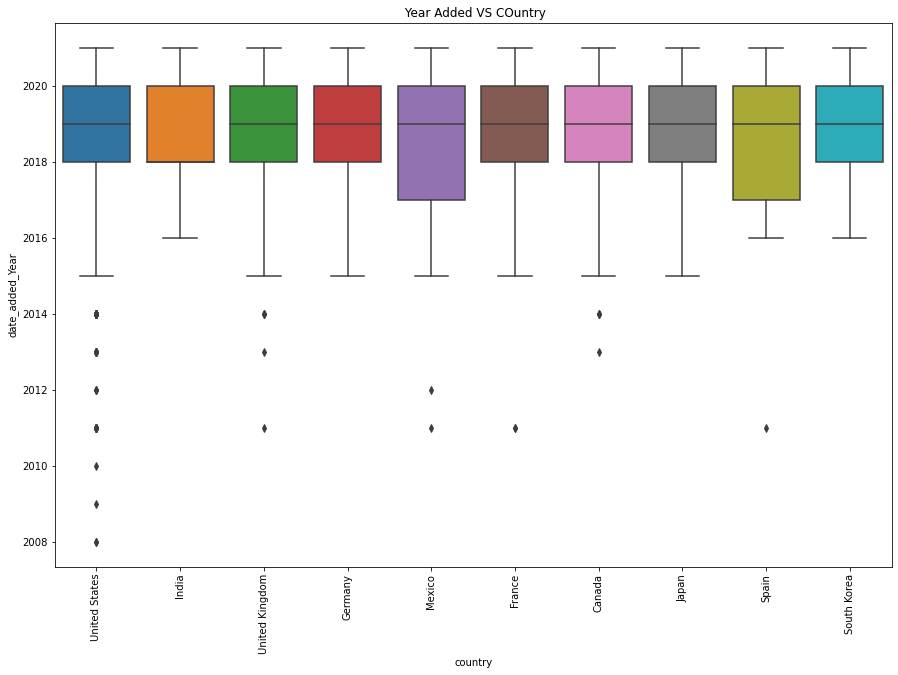

In [385]:
# Categorical vs Numerical -Bar pLot : outlier check for top 10 country (most movies / tv shows produced ) for each year 

# As number of countries very large so getting top 10 countrie sbased on number of movies and shows prodeced there 
top_10 = data_country_exp[ data_country_exp['country'].isin(data_country_exp['country'].value_counts().index[:10])]

plt.figure(figsize = (15,10))

ax = sns.boxplot(data =top_10 , y= 'date_added_Year' , x ='country'  )

plt.xticks(rotation = 90)
plt.title('  Year Added VS COuntry ')
plt.show()

### Observation :
 For USA year below 2015 is considered outlier , for India there are no outliers  and for UK,Mexico,France ,Canada ,Spain outlier present.

### Ques 6: Insights based on Non-Graphical and Visual Analysis . Ques 7: Business Insights 


### Ans 6 and 7  : 

In [15]:
data_copy['date_added_Year'].value_counts()

2019.0    2016
2020.0    1879
2018.0    1649
2021.0    1498
2017.0    1188
2016.0     429
2015.0      82
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: date_added_Year, dtype: int64

In [16]:
data_copy['date_added'].max()  # Data is there till only September,2021

Timestamp('2021-09-25 00:00:00')

In [17]:
data_copy['date_added'].isna().sum()  # Note There are 10 null values in 'date_added' column

10

In [18]:
data_copy['date_added_Month'].value_counts()

7.0     827
12.0    813
9.0     770
4.0     764
10.0    760
8.0     755
3.0     742
1.0     738
6.0     728
11.0    705
5.0     632
2.0     563
Name: date_added_Month, dtype: int64

## 1 . Number of Movies /Tv Show added per Year

In [390]:
data_unnest.groupby(['type','date_added_Year'])['type'].count()
#  We can even run below commented query will give same result as above 
# data_copy.groupby(['type','date_added_Year'])[['type']].aggregate(count_added =('type','count')).reset_index()

type     date_added_Year
Movie    2008.0                1
         2009.0                2
         2010.0                1
         2011.0               13
         2012.0                3
         2013.0                6
         2014.0               19
         2015.0               56
         2016.0              253
         2017.0              839
         2018.0             1237
         2019.0             1424
         2020.0             1284
         2021.0              993
TV Show  2008.0                1
         2013.0                5
         2014.0                5
         2015.0               26
         2016.0              176
         2017.0              349
         2018.0              412
         2019.0              592
         2020.0              595
         2021.0              505
Name: type, dtype: int64

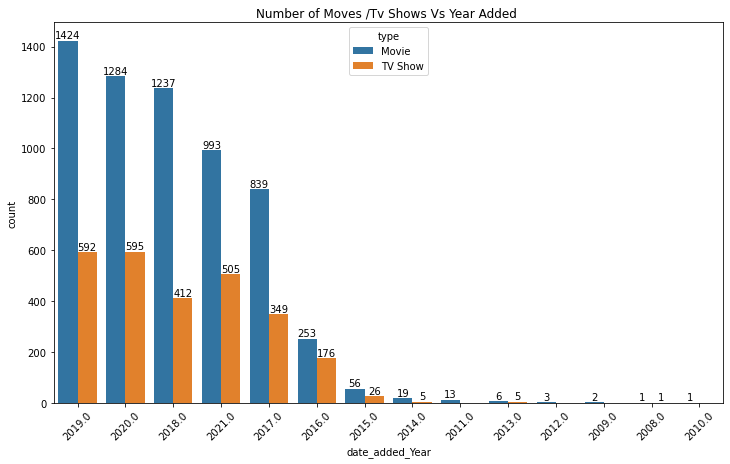

In [438]:
#  Continuous Data COUNT PLOT 
plt.figure(figsize = (12,7))

ax = sns.countplot(data =data_unnest , x= 'date_added_Year' , hue = 'type' , order = data_unnest['date_added_Year'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 45 )
plt.title('Number of Moves /Tv Shows Vs Year Added ')
plt.show()

### Observation / Insights :
Seeing above data for number of movies and Tv shows added each year we can conclude that (seeing data from 2015 year till 2021) 
 --> Number of Movies added is almost double the amount of number of TV shows added 
From this we can conclude that people tend to prefer Movies over Tv Shows as netflix has added almost double the number of Movies each year as compared to TV Shows.



## 2. Number of Movies /Tv Show added per Month

In [436]:
data_unnest.groupby(['type','date_added_Month'])['type'].count()


type     date_added_Month
Movie    1.0                 546
         2.0                 382
         3.0                 529
         4.0                 550
         5.0                 439
         6.0                 492
         7.0                 565
         8.0                 519
         9.0                 519
         10.0                545
         11.0                498
         12.0                547
TV Show  1.0                 192
         2.0                 181
         3.0                 213
         4.0                 214
         5.0                 193
         6.0                 236
         7.0                 262
         8.0                 236
         9.0                 251
         10.0                215
         11.0                207
         12.0                266
Name: type, dtype: int64

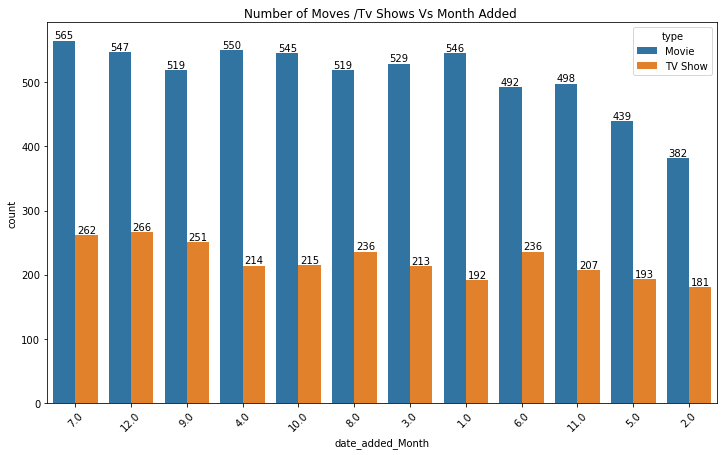

In [437]:
#  Continuous Data COUNT PLOT 
plt.figure(figsize = (12,7))

ax = sns.countplot(data =data_unnest , x= 'date_added_Month' , hue = 'type' , order = data_unnest['date_added_Month'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 45 )
plt.title('Number of Moves /Tv Shows Vs Month Added ')
plt.show()

### Observation / Insights :
Seeing above data for number of movies and Tv shows added each month we can conclude that 
 --> Number of Movies added is almost double the amount of number of TV shows added for each month 
From this we can conclude that people tend to prefer Movies over Tv Shows as netflix has added almost double the number of Movies each year as compared to TV Shows.

February is the month haveing Least Movies and Tv-SHows released on .

In [393]:
# We have already unnested (explode) country column in dataframe -> 'data_country_exp'
# Total Number of Movies and TV SHows Produced per Country 
data_country_exp['country'].value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: country, Length: 123, dtype: int64

## 3. Number of TV Shows Produced per Country

In [395]:
# Total Number of TV SHows Produced per Country 
data_country_exp.loc[data_country_exp['type'] == 'TV Show' , 'country'].value_counts()

United States           938
United Kingdom          272
Japan                   199
South Korea             170
Canada                  126
                       ... 
Malta                     1
Belarus                   1
United Arab Emirates      1
Uruguay                   1
Switzerland               1
Name: country, Length: 66, dtype: int64

## 4. Number of Movies Produced per Country 

In [398]:
# Total Number of Movies Produced per Country 
data_country_exp.loc[data_country_exp['type'] == 'Movie' , 'country'].value_counts()

United States     2752
India              962
United Kingdom     534
Canada             319
France             303
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 118, dtype: int64

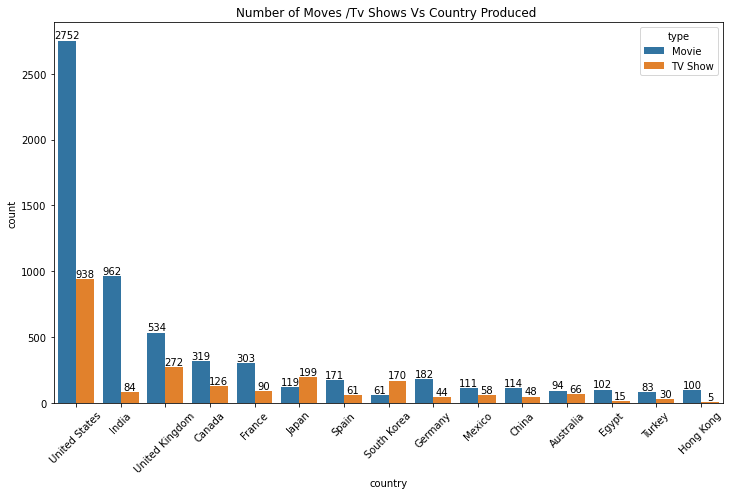

In [428]:
#  COUNT PLOT 
top_15_country = data_country_exp[ data_country_exp['country'].isin(data_country_exp['country'].value_counts().index[:15])]

plt.figure(figsize = (12,7))

ax = sns.countplot(data =top_15_country, x= 'country' , hue = 'type' , order = top_15_country['country'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 45 )
plt.title('Number of Moves /Tv Shows Vs Country Produced ')
plt.show()

In [426]:
# Getiing % of Movies and Tv Shows prodcued in United States 

ans_m  =(data_country_exp.loc[data_country_exp['type'] =='Movie', 'country'].value_counts()[0] / data_country_exp.loc[data_country_exp['type'] == 'Movie' , 'country'].value_counts().sum() )*100
ans_t  =(data_country_exp.loc[data_country_exp['type'] =='TV Show','country'].value_counts()[0] / data_country_exp.loc[data_country_exp['type'] == 'TV Show' , 'country'].value_counts().sum())*100 
print('Percnetage of Movies  Produced in USA = ',np.round(ans_m  ,2))
print('Percnetage of Tv Shows Produced in USA = ',np.round(ans_t  ,2))


Percnetage of Movies  Produced in USA =  37.3
Percnetage of Tv Shows Produced in USA =  35.53


### Observation / Insights :
Seeing above plot for top 15 countries where most movies and tv shows produced we can conclude that :
Netflix data has most  movies and tv shows produced in Unites States followed by  India , United Kingdom , Canada , France . 

From this we can also conclude that almost 37 % of Movies and 35 % of TV SHows prodcued in USA .
So We can say that netflix users like most of the Movies and Tv shows produced in USA. 

## 5 . Number of Movies Produced per Genre

In [406]:
data_listed_in_exp.loc[data_listed_in_exp['type'] == 'Movie' , 'listed_in'].value_counts()

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: listed_in, dtype: int64

## 6 . Number of TV SHows Produced per Genre

In [427]:
data_listed_in_exp.loc[data_listed_in_exp['type'] == 'TV Show' , 'listed_in'].value_counts()

International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: listed_in, dtype: int64

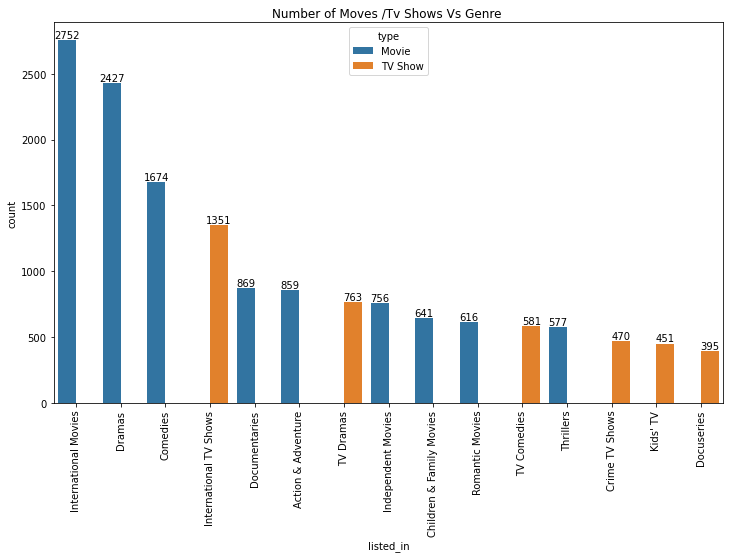

In [431]:
# COUNT PLOT 
top_15_genres = data_listed_in_exp[data_listed_in_exp['listed_in'].isin(data_listed_in_exp['listed_in'].value_counts().index[:15])]

plt.figure(figsize = (12,7))

ax = sns.countplot(data =top_15_genres, x= 'listed_in' , hue = 'type' , order = top_15_genres['listed_in'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 90 )
plt.title('Number of Moves /Tv Shows Vs Genre ')
plt.show()

In [433]:
ans_m  =(data_listed_in_exp.loc[data_listed_in_exp['type'] =='Movie', 'listed_in'].value_counts()[0] / data_listed_in_exp.loc[data_listed_in_exp['type'] =='Movie', 'listed_in'].value_counts().sum() )*100
ans_t  =(data_listed_in_exp.loc[data_listed_in_exp['type'] =='TV Show','listed_in'].value_counts()[0] / data_listed_in_exp.loc[data_listed_in_exp['type'] =='TV Show','listed_in'].value_counts().sum() )*100 
print('Percnetage of Movies  of Genre :International Movies = ',np.round(ans_m  ,2))
print('Percnetage of Tv Shows of Genre : International TV Shows= ',np.round(ans_t  ,2))


Percnetage of Movies  of Genre :International Movies =  20.86
Percnetage of Tv Shows of Genre : International TV Shows=  22.03


### Observation / Insights :
Seeing above plot for top 15 genres for  movies and tv shows we can conclude that most Most watched Genre in Movies are 'International Movies' ,'Dramas' ,'Comedies' Genre. Whereas for TV shows most watched genre are 'International TV Shows' , 'TV Drama' , 'TV Comedies' Genre .

From above caculation and Observation we can also conclude that almost 21 % of Movies are of 'International Movies' Genre and 22 % of TV SHows are of 'International TV Shows' genre. 
So We can say that netflix users like most of the Internation Movies and Intternation Tv shows.

## 7 . Number of TV Shows Produced per Duration (Number of Seasons )


In [440]:
data_unnest.loc[data_unnest['type'] == 'TV Show','duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

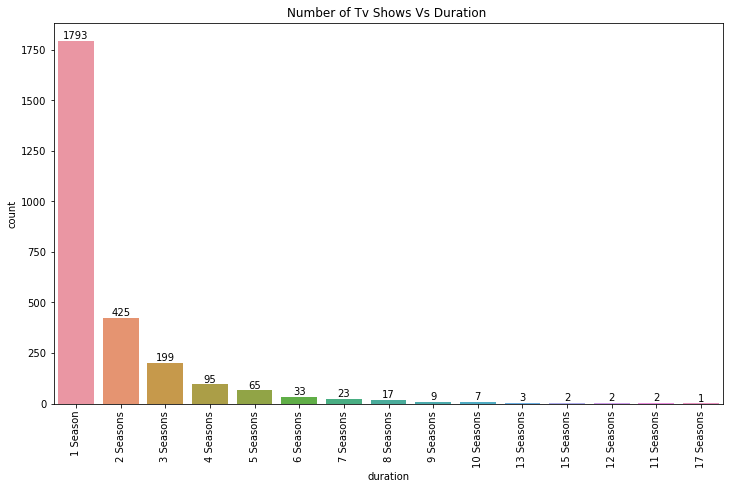

In [442]:
# COUNT PLOT 

plt.figure(figsize = (12,7))

ax = sns.countplot(data =data_tvshow, x= 'duration' , order = data_tvshow['duration'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 90 )
plt.title('Number of Tv Shows Vs Duration ')
plt.show()

## 8 . Number of Movies Produced per Duration (Number of Minutes )

In [441]:
data_unnest.loc[data_unnest['type'] == 'Movie','duration'].value_counts()

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

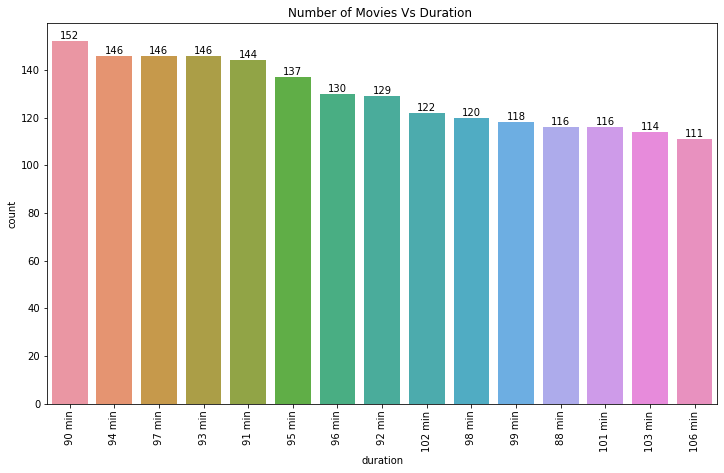

In [444]:
# COUNT PLOT 
top_15_durations = data_movies[data_movies['duration'].isin(data_movies['duration'].value_counts().index[:15])]

plt.figure(figsize = (12,7))

ax = sns.countplot(data =top_15_durations, x= 'duration' , order = top_15_durations['duration'].value_counts().index )
for i in ax.containers:
    ax.bar_label(i)

plt.xticks(rotation = 90 )
plt.title('Number of Movies Vs Duration ')
plt.show()

### Observation / Insights :
Seeing above plots for Movies and Tv Shows versus Duration we can conclude that Netflix adds more amount of short duration movies ( not very short) . In case of Movies around 90 minutes movies is most available and Netflix has mostly 1 Season TV SHows .

As number of sesons increase in TV Shows the number of TV Shows in Netflix decrease ( Expected as not many TV SHows have more than 1 seaons and the TV shows plot tend to end in 1 season ) .



In [446]:
data_unnest['date_added'].max()

Timestamp('2021-09-25 00:00:00')

### Ques 8: Recommendations 

### Ans8

Seeing above 8 types of data analysis and its plots we can conclude that :
    
1. For Count of Movies and TV Shows added each year we can see a growing trend in number of movies added each year from 2012 to 2019 , In 2020 we can see number of movies produce decreased but number of tv shows produced remained same . In 2021 the count further reduced this can be seen as we only have data till September ,2021.The decrese in number of movies in 2020 can be due to COVID wave which hit across all countries.

2. For Count of Movies and TV Shows added each month data is almost same for all months , except month February where count of movies and tv shows is little less as compared to others month

3. From Number of Movies and TV shows produced per Country analysis we cna see that  almost 37 % of Movies and 35 % of TV SHows in Netflix are prodcued in USA .After USA next country producing most Movies and TV shows is India . 

4. From Number of Movies and TV shows per genre analysis  we can  conclude that almost 21 % of Movies are of 'International Movies' Genre and 22 % of TV SHows are of 'International TV Shows' genre in Netflix.So We can say that netflix users like most of the Internation Movies and Intternation Tv shows.

5. For Movies and Tv Shows versus Duration we can conclude that Netflix adds more amount of short duration movies ( not very short) . In case of Movies around 90 minutes movies is most available and Netflix has mostly 1 Season TV SHows .As number of sesons increase in TV Shows the number of TV Shows available in Netflix decrease ( Expected as not many TV SHows have more than 1 sesaons and the TV shows plot tend to end in 1 season ) .

#### Actional Items for Netflix Bussiness:- 

1. They can promote and produce least genre movies and tv shows in countries like USA and India ( From Data we can conclude that Netflix users tend to prefer movies ,tv shows produced in USA,India , United Kingdom. 

2. Netlfix should to  add / create  Movies and Tv SHows having combination of least favorite genre and most favorite genre , this will motivate and have higher chance of users wathcing them in netflix.

3. Netflix should produce / introduce shorter duartion movies (around 90 to 120 minutes ) and tv shows ( 1 to 2 seasons ) as most of movies and tv shows are of short duration (90 min / 1 season ) . 

4. More number of Movies as copared to TV shows in Netflix shows that Movies are more profitable and preferred by users in Netflix . And as International Movies and TV shows are most sought after genre in Netflix  so bussiness can start inlcuding more movies produced in Countries like India , Japan , Spain , South Korea ,China  where cost of production is very less as compared to USA and they will also come under International Movies and TV Shows genre tag. 


5. Bussiness can also produce more movies and tv shows with Top Directors and with Top Cast, in order to increase its chance to liked by user and more of them can be produced each year .
